In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import wordcloud

### The following cell will read the data from the csv files into pandas dataframes

In [35]:
ratings = pd.read_csv("ratings.csv",encoding='latin-1',sep='\t',usecols=['user_id', 'movie_id','user_embedded_id', 'movie_embedded_id','rating'])

max_userid = ratings['user_id'].drop_duplicates().max()
max_movieid = ratings['movie_id'].drop_duplicates().max()

users = pd.read_csv('users.csv',encoding='latin-1',sep='\t',usecols=['user_id', 'gender','zipcode','age_description','occupation_description'])

movies = pd.read_csv("movies.csv",encoding='latin-1',sep='\t',usecols=['movie_id','title','genres'])

In [36]:
print(ratings.head())
print(ratings.info())

   user_id  movie_id  rating  user_embedded_id  movie_embedded_id
0        1      1193       5                 0               1192
1        1       661       3                 0                660
2        1       914       3                 0                913
3        1      3408       4                 0               3407
4        1      2355       5                 0               2354
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
user_id              1000209 non-null int64
movie_id             1000209 non-null int64
rating               1000209 non-null int64
user_embedded_id     1000209 non-null int64
movie_embedded_id    1000209 non-null int64
dtypes: int64(5)
memory usage: 38.2 MB
None


In [11]:
print(users.head())
print(users.info())

   user_id gender zipcode age_description occupation_description
0        1      F   48067             <18           K-12 student
1        2      M   70072             56+          self-employed
2        3      M   55117           25-34              scientist
3        4      M   02460           45-49   executive/managerial
4        5      M   55455           25-34                 writer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id                   6040 non-null int64
gender                    6040 non-null object
zipcode                   6040 non-null object
age_description           6040 non-null object
occupation_description    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB
None


In [47]:
print(movies.head())
print(movies.info())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


#### Next we will explore the data a bit through summary statistics 

3.581564453029317


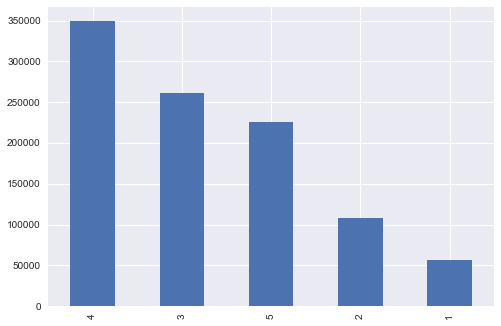

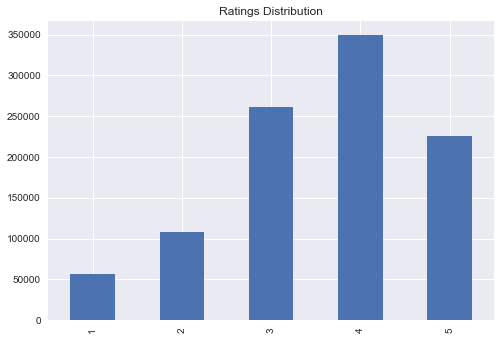

In [67]:
ratings['rating'].fillna(ratings['rating'].median)

print(ratings['rating'].mean())
ratings['rating'].value_counts().plot(kind='bar')
plit
plt.show()

ratings['rating'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("Ratings Distribution")
plt.show()

In [81]:
ratings['rating'].value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64

In [100]:
combined_dataset = pd.merge(pd.merge(movies,ratings),users)

combined_dataset.sort_values('rating',ascending=False).head(50)

,movie_id,title,genres,user_id,rating,user_embedded_id,movie_embedded_id,gender,zipcode,age_description,occupation_description
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,0,0,F,48067,<18,K-12 student
489283,2858,American Beauty (1999),Comedy|Drama,5070,5,5069,2857,M,55344,25-34,artist
489259,2599,Election (1999),Comedy,5070,5,5069,2598,M,55344,25-34,artist
489257,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5070,5,5069,2570,M,55344,25-34,artist
489256,2551,Dead Ringers (1988),Drama|Thriller,5070,5,5069,2550,M,55344,25-34,artist
489237,2395,Rushmore (1998),Comedy,5070,5,5069,2394,M,55344,25-34,artist
489236,2391,"Simple Plan, A (1998)",Crime|Thriller,5070,5,5069,2390,M,55344,25-34,artist
489226,2330,Hands on a Hard Body (1996),Documentary,5070,5,5069,2329,M,55344,25-34,artist
489224,2321,Pleasantville (1998),Comedy,5070,5,5069,2320,M,55344,25-34,artist
489212,2248,Say Anything... (1989),Comedy|Drama|Romance,5070,5,5069,2247,M,55344,25-34,artist


In [52]:
#count the amount of times each genre occurs

genre_counts = {}

for g in movies['genres']:
    words = g.split('|')
    for word in words:
        if word not in genre_counts:
            genre_counts[word] = 1
        else:
            genre_counts[word] += 1

In [53]:
genre_counts

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

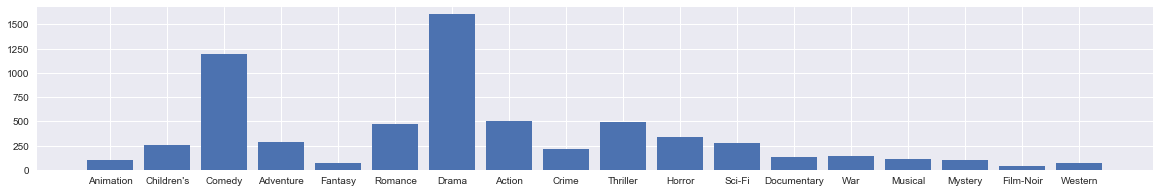

In [78]:
plt.figure(figsize=(20,3))
plt.bar(range(len(genre_counts)),list(genre_counts.values()),tick_label=list(genre_counts.keys()))
plt.show()

In [69]:
age_ranges_count = {}

for a in users['age_description']:
    if a not in age_ranges_count:
        age_ranges_count[a] = 1
    else:
        age_ranges_count[a] += 1


In [70]:
age_ranges_count

{'18-24': 1103,
 '25-34': 2096,
 '35-44': 1193,
 '45-49': 550,
 '50-55': 496,
 '56+': 380,
 '<18': 222}

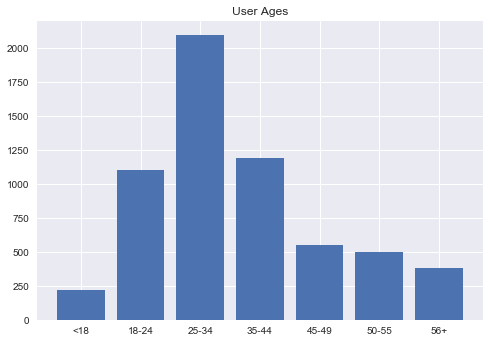

In [71]:
plt.bar(range(len(age_ranges_count)),[222,1103,2096,1193,550,496,380],tick_label=['<18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.title("User Ages")
plt.show()

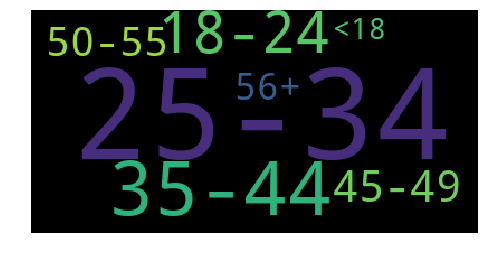

In [89]:
ac_genres = wordcloud.WordCloud(background_color='black').generate_from_frequencies(age_ranges_count)
plt.imshow(wc_genres)
plt.axis('off')
plt.show()

In [92]:
occupation_counts = {}


for o in users['occupation_description']:
    if o not in occupation_counts:
        occupation_counts[o] = 1
    else:
        occupation_counts[o] += 1


In [93]:
occupation_counts

{'K-12 student': 195,
 'academic/educator': 528,
 'artist': 267,
 'clerical/admin': 173,
 'college/grad student': 759,
 'customer service': 112,
 'doctor/health care': 236,
 'executive/managerial': 679,
 'farmer': 17,
 'homemaker': 92,
 'lawyer': 129,
 'other/not specified': 711,
 'programmer': 388,
 'retired': 142,
 'sales/marketing': 302,
 'scientist': 144,
 'self-employed': 241,
 'technician/engineer': 502,
 'tradesman/craftsman': 70,
 'unemployed': 72,
 'writer': 281}

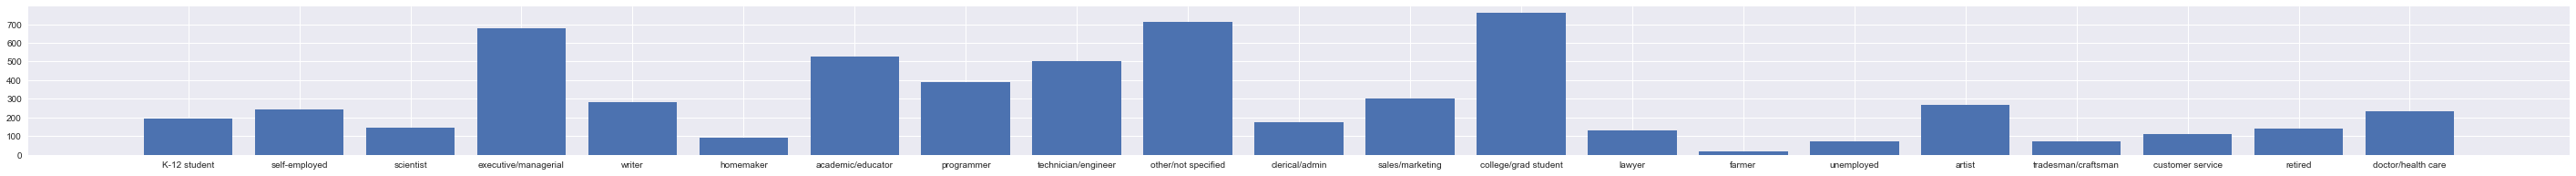

In [96]:
plt.figure(figsize=(50,3))
plt.bar(range(len(occupation_counts)),list(occupation_counts.values()),tick_label=list(occupation_counts.keys()))
plt.show()

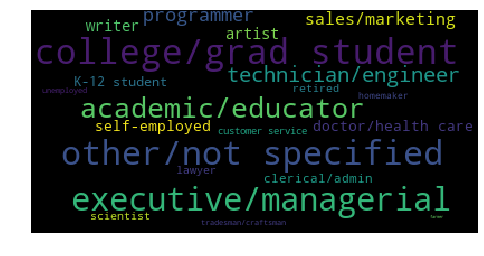

In [97]:
oc_genres = wordcloud.WordCloud(background_color='black').generate_from_frequencies(occupation_counts)
plt.imshow(oc_genres)
plt.axis('off')
plt.show()


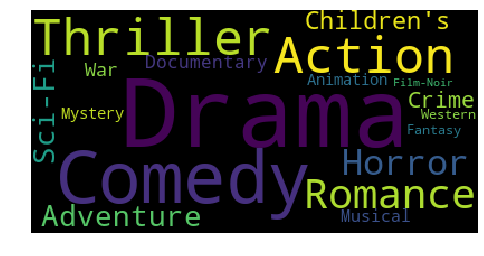

In [90]:
wc_genres = wordcloud.WordCloud(background_color='black').generate_from_frequencies(genre_counts)
plt.imshow(wc_genres)
plt.axis('off')
plt.show()

#### Content Based Filtering and Collaborative Filtering

In [76]:
movies['genres'].str.split('|')

0          [Animation, Children's, Comedy]
1         [Adventure, Children's, Fantasy]
2                        [Comedy, Romance]
3                          [Comedy, Drama]
4                                 [Comedy]
5                [Action, Crime, Thriller]
6                        [Comedy, Romance]
7                  [Adventure, Children's]
8                                 [Action]
9            [Action, Adventure, Thriller]
10                [Comedy, Drama, Romance]
11                        [Comedy, Horror]
12                 [Animation, Children's]
13                                 [Drama]
14            [Action, Adventure, Romance]
15                       [Drama, Thriller]
16                        [Drama, Romance]
17                              [Thriller]
18                                [Comedy]
19                                [Action]
20                 [Action, Comedy, Drama]
21                [Crime, Drama, Thriller]
22                              [Thriller]
23         

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'].str.split('|').fillna("").astype('str'))

In [78]:
tfidf_matrix.shape

(3883, 127)

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [80]:
# Build a 1-dimensional array with movie titles
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    similar_scores = list(enumerate(cosine_similarity[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:50]
    movie_indexes= [i[0] for i in similar_scores]
    return movies['title'].iloc[movie_indexes]

In [85]:
genre_recommendations('Sword in the Stone, The (1963)').tail(20)

3218                          Tigger Movie, The (2000)
3331             We're Back! A Dinosaur's Story (1993)
3414                     Road to El Dorado, The (2000)
3546                                   Dinosaur (2000)
3730                     Pokémon the Movie 2000 (2000)
0                                     Toy Story (1995)
1050            Aladdin and the King of Thieves (1996)
2072                          American Tail, An (1986)
2073        American Tail: Fievel Goes West, An (1991)
2285                         Rugrats Movie, The (1998)
2286                              Bug's Life, A (1998)
3045                                Toy Story 2 (1999)
3542                             Saludos Amigos (1943)
3682                                Chicken Run (2000)
3685    Adventures of Rocky and Bullwinkle, The (2000)
236                              Goofy Movie, A (1995)
2830                         Gulliver's Travels (1939)
3875                         Digimon: The Movie (2000)
360       

In [116]:
indices

title
Toy Story (1995)                                           0
Jumanji (1995)                                             1
Grumpier Old Men (1995)                                    2
Waiting to Exhale (1995)                                   3
Father of the Bride Part II (1995)                         4
Heat (1995)                                                5
Sabrina (1995)                                             6
Tom and Huck (1995)                                        7
Sudden Death (1995)                                        8
GoldenEye (1995)                                           9
American President, The (1995)                            10
Dracula: Dead and Loving It (1995)                        11
Balto (1995)                                              12
Nixon (1995)                                              13
Cutthroat Island (1995)                                   14
Casino (1995)                                             15
Sense and Sensibil

In [120]:
combined_dataset.head()

,movie_id,title,genres,user_id,rating,gender,zipcode,age_description,occupation_description
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,48067,<18,K-12 student
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,48067,<18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,F,48067,<18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,48067,<18,K-12 student
4,527,Schindler's List (1993),Drama|War,1,5,F,48067,<18,K-12 student


# ITEM BASED COLLABORATIVE FILTERING

In [101]:
movieRatings = combined_dataset.pivot_table(index=['user_id'],columns=['title'],values='rating')

In [102]:
movieRatings.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
movieRatings.head(50)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
corrMatrix = movieRatings.corr()
corrMatrix.head()

KeyboardInterrupt: 

In [125]:
#Use Pearson Correlation 

corrMatrix = movieRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.088541,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
randomRatings = movieRatings.loc[11].dropna()

NameError: name 'movieRatings' is not defined

In [127]:
randomRatings

title
'burbs, The (1989)                                        4.0
12 Angry Men (1957)                                       3.0
13th Warrior, The (1999)                                  4.0
20,000 Leagues Under the Sea (1954)                       4.0
2001: A Space Odyssey (1968)                              3.0
7th Voyage of Sinbad, The (1958)                          2.0
Abbott and Costello Meet Frankenstein (1948)              4.0
Absent Minded Professor, The (1961)                       5.0
Abyss, The (1989)                                         4.0
Ace Ventura: Pet Detective (1994)                         4.0
Addams Family, The (1991)                                 3.0
Adventures in Babysitting (1987)                          4.0
Affair to Remember, An (1957)                             2.0
African Queen, The (1951)                                 3.0
Airplane! (1980)                                          4.0
Aladdin (1992)                                            4.0
Al

In [152]:

def getSimilarCandidates(userId):
    similarCandidates = pd.Series()
    userRatings = movieRatings.loc[userId].dropna()
    for i in range(0, len(userRatings.index)):
        print(f"Adding similar movies to {randomRatings.index[i]}...")
        similars = corrMatrix[userRatings.index[i]].dropna()
        #Scale
        similars = similars.map(lambda x: x * userRatings[i])
        similarCandidates = similarCandidates.append(similars)
        
    similarCandidates.groupby(similarCandidates.index).sum()
    similarCandidates.sort_values(inplace=True,ascending=False)
    
    similarCandidates = similarCandidates.drop(userRatings.index)
    
    return similarCandidates

        


In [154]:
similarMovies = getSimilarCandidates(1)
print(similarMovies.head(10))

Adding similar movies to 'burbs, The (1989)...
Adding similar movies to 12 Angry Men (1957)...
Adding similar movies to 13th Warrior, The (1999)...
Adding similar movies to 20,000 Leagues Under the Sea (1954)...
Adding similar movies to 2001: A Space Odyssey (1968)...
Adding similar movies to 7th Voyage of Sinbad, The (1958)...
Adding similar movies to Abbott and Costello Meet Frankenstein (1948)...
Adding similar movies to Absent Minded Professor, The (1961)...
Adding similar movies to Abyss, The (1989)...
Adding similar movies to Ace Ventura: Pet Detective (1994)...
Adding similar movies to Addams Family, The (1991)...
Adding similar movies to Adventures in Babysitting (1987)...
Adding similar movies to Affair to Remember, An (1957)...
Adding similar movies to African Queen, The (1951)...
Adding similar movies to Airplane! (1980)...
Adding similar movies to Aladdin (1992)...
Adding similar movies to Alice in Wonderland (1951)...
Adding similar movies to Alien (1979)...
Adding similar

In [134]:
movieRatings.loc[1]

title
$1,000,000 Duck (1971)                           NaN
'Night Mother (1986)                             NaN
'Til There Was You (1997)                        NaN
'burbs, The (1989)                               NaN
...And Justice for All (1979)                    NaN
1-900 (1994)                                     NaN
10 Things I Hate About You (1999)                NaN
101 Dalmatians (1961)                            NaN
101 Dalmatians (1996)                            NaN
12 Angry Men (1957)                              NaN
13th Warrior, The (1999)                         NaN
187 (1997)                                       NaN
2 Days in the Valley (1996)                      NaN
20 Dates (1998)                                  NaN
20,000 Leagues Under the Sea (1954)              NaN
200 Cigarettes (1999)                            NaN
2001: A Space Odyssey (1968)                     NaN
2010 (1984)                                      NaN
24 7: Twenty Four Seven (1997)          

### Evaluation of Item-Item and User-User

In [5]:
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [8]:
from sklearn import cross_validation as cv

training_data, test_data = cv.train_test_split(subset,test_size=0.2)

In [7]:
subset = ratings.sample(frac=0.02)

In [11]:
training_data_matrix = training_data.as_matrix(columns=['user_id', 'movie_id', 'rating'])
testing_data_matrix = test_data.as_matrix(columns=['user_id', 'movie_id', 'rating'])

In [10]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = 1 - pairwise_distances(training_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0

In [12]:
item_correlation = 1 - pairwise_distances(training_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0

In [21]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [22]:
predict(training_data_matrix, user_correlation,type='user')

array([[ 4502.47000311,  2798.51005435,  1067.01994254],
       [ 4461.67192263,  2675.36989178,   979.9581856 ],
       [ 4482.76501498,  2603.11861941,   960.11636561],
       ..., 
       [ 3342.23967002,  1281.58544407,  -214.82511409],
       [ 3596.66088176,  1750.22800879,    87.11110945],
       [ 4230.12737833,  2636.55438465,   865.31823702]])

In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [17]:
user_prediction = predict(training_data_matrix, user_correlation, type='user')
item_prediction = predict(training_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, testing_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, testing_data_matrix)))

User-based CF RMSE: 1426.6489686207692
Item-based CF RMSE: 1641.4576260491742


In [19]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, training_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, training_data_matrix)))

User-based CF RMSE: 696.1703994841617
Item-based CF RMSE: 162.23468979632517


### DEEP LEARNING BASED MODEL

In [25]:

import numpy as np
from keras.layers import Embedding, Reshape, Merge, Dropout, Dense
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.models import Sequential

class CFModel(Sequential):

    def __init__(self, n_users, m_items, k_factors, **kwargs):
        P = Sequential()
        P.add(Embedding(n_users, k_factors, input_length=1))
        P.add(Reshape((k_factors,)))
        Q = Sequential()
        Q.add(Embedding(m_items, k_factors, input_length=1))
        Q.add(Reshape((k_factors,)))
        super(CFModel, self).__init__(**kwargs)
        self.add(Merge([P, Q], mode='dot', dot_axes=1))

    def rate(self, user_id, item_id):
        return self.predict([np.array([user_id]), np.array([item_id])])[0][0]

class DeepModel(Sequential):

    def __init__(self, n_users, m_items, k_factors, p_dropout=0.1, **kwargs):
        P = Sequential()
        P.add(Embedding(n_users, k_factors, input_length=1))
        P.add(Reshape((k_factors,)))
        Q = Sequential()
        Q.add(Embedding(m_items, k_factors, input_length=1))
        Q.add(Reshape((k_factors,)))
        super(DeepModel, self).__init__(**kwargs)
        self.add(Merge([P, Q], mode='concat'))
        self.add(Dropout(p_dropout))
        self.add(Dense(k_factors, activation='relu'))
        self.add(Dropout(p_dropout))
        self.add(Dense(1, activation='linear'))

    def rate(self, user_id, item_id):
        return self.predict([np.array([user_id]), np.array([item_id])])[0][0]

In [38]:
# Create training set
shuffled_ratings = ratings.sample(frac=1., random_state=1)

# Shuffling users
Users = shuffled_ratings['user_embedded_id'].values
print('Users:', Users, ', shape =', Users.shape)

# Shuffling movies
Movies = shuffled_ratings['movie_embedded_id'].values
print('Movies:', Movies, ', shape =', Movies.shape)

# Shuffling ratings
Ratings = shuffled_ratings['rating'].values
print('Ratings:', Ratings, ', shape =', Ratings.shape)

Users: [3808 1388 4509 ..., 2898 3024  827] , shape = (1000209,)
Movies: [2923 1956 1478 ..., 2663 1295 1380] , shape = (1000209,)
Ratings: [4 4 2 ..., 4 5 2] , shape = (1000209,)


In [39]:
model = CFModel(max_userid, max_movieid,100)
model.compile(loss='mse', optimizer='adamax')

C:\Users\cyrus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [40]:
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('weights.h5', save_best_only=True)]

# Use 30 epochs, 90% training data, 10% validation data 
history = model.fit([Users, Movies], Ratings, nb_epoch=30, validation_split=.1, verbose=2, callbacks=callbacks)

C:\Users\cyrus\Anaconda3\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 900188 samples, validate on 100021 samples
Epoch 1/30
 - 480s - loss: 8.2042 - val_loss: 2.2419
Epoch 2/30
 - 481s - loss: 1.4852 - val_loss: 1.1287
Epoch 3/30
 - 536s - loss: 1.0048 - val_loss: 0.9420
Epoch 4/30
 - 507s - loss: 0.8932 - val_loss: 0.8793
Epoch 5/30
 - 486s - loss: 0.8444 - val_loss: 0.8451
Epoch 6/30
 - 485s - loss: 0.8130 - val_loss: 0.8257
Epoch 7/30
 - 495s - loss: 0.7889 - val_loss: 0.8110
Epoch 8/30
 - 482s - loss: 0.7682 - val_loss: 0.7971
Epoch 9/30
 - 480s - loss: 0.7481 - val_loss: 0.7876
Epoch 10/30
 - 503s - loss: 0.7279 - val_loss: 0.7790
Epoch 11/30
 - 469s - loss: 0.7073 - val_loss: 0.7706
Epoch 12/30
 - 466s - loss: 0.6871 - val_loss: 0.7635
Epoch 13/30
 - 471s - loss: 0.6666 - val_loss: 0.7584
Epoch 14/30
 - 473s - loss: 0.6458 - val_loss: 0.7543
Epoch 15/30
 - 489s - loss: 0.6251 - val_loss: 0.7524
Epoch 16/30
 - 556s - loss: 0.6042 - val_loss: 0.7495
Epoch 17/30
 - 561s - loss: 0.5835 - val_loss: 0.7516
Epoch 18/30
 - 551s - loss: 0.5628 - va

In [43]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))


In [44]:
min_val_loss

0.74948510869401441

C:\Users\cyrus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


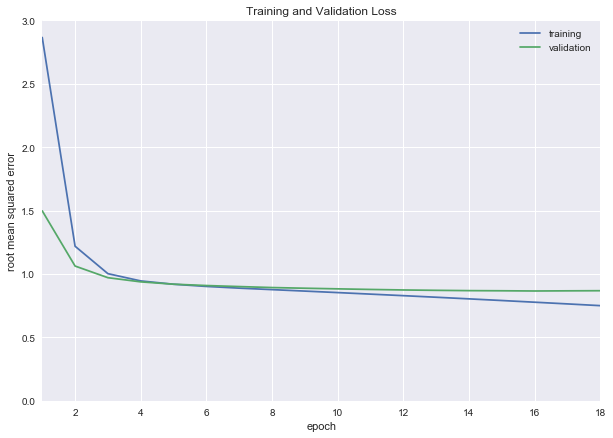

In [50]:
import math

loss = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                     'training': [ math.sqrt(loss) for loss in history.history['loss'] ],
                     'validation': [ math.sqrt(loss) for loss in history.history['val_loss'] ]})
ax = loss.ix[:,:].plot(x='epoch', figsize={7,10}, grid=True)
ax.set_ylabel("root mean squared error")
ax.set_ylim([0.0,3.0]);
plt.title("Training and Validation Loss")
plt.show()

In [52]:
# Use the pre-trained model
trained_model = CFModel(max_userid, max_movieid, 100)
# Load weights
trained_model.load_weights('weights.h5')

C:\Users\cyrus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [53]:
users[users['user_id'] == 4000]

,user_id,gender,zipcode,age_description,occupation_description
3999,4000,M,08876,35-44,executive/managerial


In [56]:
def predict_rating(user_id, movie_id):
    return trained_model.rate(user_id - 1, movie_id - 1)

In [137]:
user_ratings = ratings[ratings['user_id'] == 10][['user_id', 'movie_id', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(6000, x['movie_id']), axis=1)
user_ratings.sort_values(by='prediction', 
                         ascending=False).merge(movies, 
                                                on='movie_id', 
                                                how='inner', 
                                                suffixes=['_u', '_m']).head(20)[['title','prediction', 'rating']]

,title,prediction,rating
0,Braveheart (1995),4.815575,4
1,"Matrix, The (1999)",4.809811,5
2,"Sixth Sense, The (1999)",4.791527,5
3,Schindler's List (1993),4.773624,4
4,Star Wars: Episode IV - A New Hope (1977),4.717513,5
5,Raiders of the Lost Ark (1981),4.715364,5
6,"Shawshank Redemption, The (1994)",4.700040,4
7,Terminator 2: Judgment Day (1991),4.639531,4
8,Forrest Gump (1994),4.576076,5
9,"Terminator, The (1984)",4.517930,5


In [181]:
recommendations = ratings[ratings['movie_id'].isin(user_ratings['movie_id']) == False][['movie_id']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(40, x['movie_id']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(movies,
                                                 on='movie_id',
                                                 how='inner',
                                                 suffixes=['_u', '_m']).head(20)[['title', 'prediction', 'genres']]

,title,prediction,genres
0,Sanjuro (1962),4.685768,Action|Adventure
1,Rear Window (1954),4.660487,Mystery|Thriller
2,Pather Panchali (1955),4.642220,Drama
3,To Kill a Mockingbird (1962),4.605368,Drama
4,"Great Escape, The (1963)",4.587509,Adventure|War
5,"Sting, The (1973)",4.587248,Comedy|Crime
6,It's a Wonderful Life (1946),4.576234,Drama
7,"Wrong Trousers, The (1993)",4.563430,Animation|Comedy
8,"Usual Suspects, The (1995)",4.555405,Crime|Thriller
9,"Close Shave, A (1995)",4.537867,Animation|Comedy|Thriller


In [195]:
user_ratings = ratings[ratings['user_id'] == 103][['user_id', 'movie_id', 'rating']]
user_ratings.sort_values(by='rating', 
                         ascending=False).merge(movies, 
                                                on='movie_id', 
                                                how='inner', 
                                                suffixes=['_u', '_m']).head(20)[['title', 'rating', 'genres']]

,title,rating,genres
0,Mystery Men (1999),5,Action|Adventure|Comedy
1,Cutthroat Island (1995),5,Action|Adventure|Romance
2,Titan A.E. (2000),5,Adventure|Animation|Sci-Fi
3,"Hunt for Red October, The (1990)",5,Action|Thriller
4,"Peacemaker, The (1997)",5,Action|Thriller|War
5,Lethal Weapon 3 (1992),5,Action|Comedy|Crime|Drama
6,"Fugitive, The (1993)",5,Action|Thriller
7,"Firm, The (1993)",5,Drama|Thriller
8,"Rocky Horror Picture Show, The (1975)",5,Comedy|Horror|Musical|Sci-Fi
9,Rudy (1993),5,Drama


In [61]:
user_ratings

,user_id,movie_id,rating
664403,4000,1252,5
664404,4000,1258,4
664405,4000,589,5
664406,4000,2,4
664407,4000,1261,5
664408,4000,1267,5
664409,4000,3018,5
664410,4000,1270,3
664411,4000,1278,5
664412,4000,913,4


6040